In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from xml.etree import ElementTree as ET
import numpy as np
from scipy import stats

In [2]:
def extract_music_info(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Find direction-type elements containing words
    words_elements = root.findall(".//direction-type/words")

    # Look for the element with makam, form, and usul information
    for element in words_elements:
        text = element.text
        if "Makam:" in text:
            return text.strip()

    return None

In [ ]:
# set path to where SymbTr/MusicXML is stored
dataset_path = "SET_PATH_HERE"

In [4]:
makam_usul_counts = defaultdict(lambda: defaultdict(int))
unique_makams = set()
unique_usuls = set()

for filename in os.listdir(dataset_path):
    if filename.endswith(".xml"):
        song_info = extract_music_info(os.path.join(dataset_path, filename))
        makam = song_info.split(",")[0].split(":")[1].strip()
        usul = song_info.split(",")[2].split(":")[1].strip()
        unique_makams.add(makam)
        unique_usuls.add(usul)
        makam_usul_counts[makam][usul] += 1

In [5]:
unique_makams = sorted(unique_makams)
unique_usuls = sorted(unique_usuls)
makam_usul_df = pd.DataFrame(
    0, index=list(unique_makams), columns=list(unique_usuls)
)
for makam, usuls in makam_usul_counts.items():
    for usul, count in usuls.items():
        makam_usul_df.loc[makam, usul] = count

In [6]:
print(len(unique_makams), len(unique_usuls))

155 107


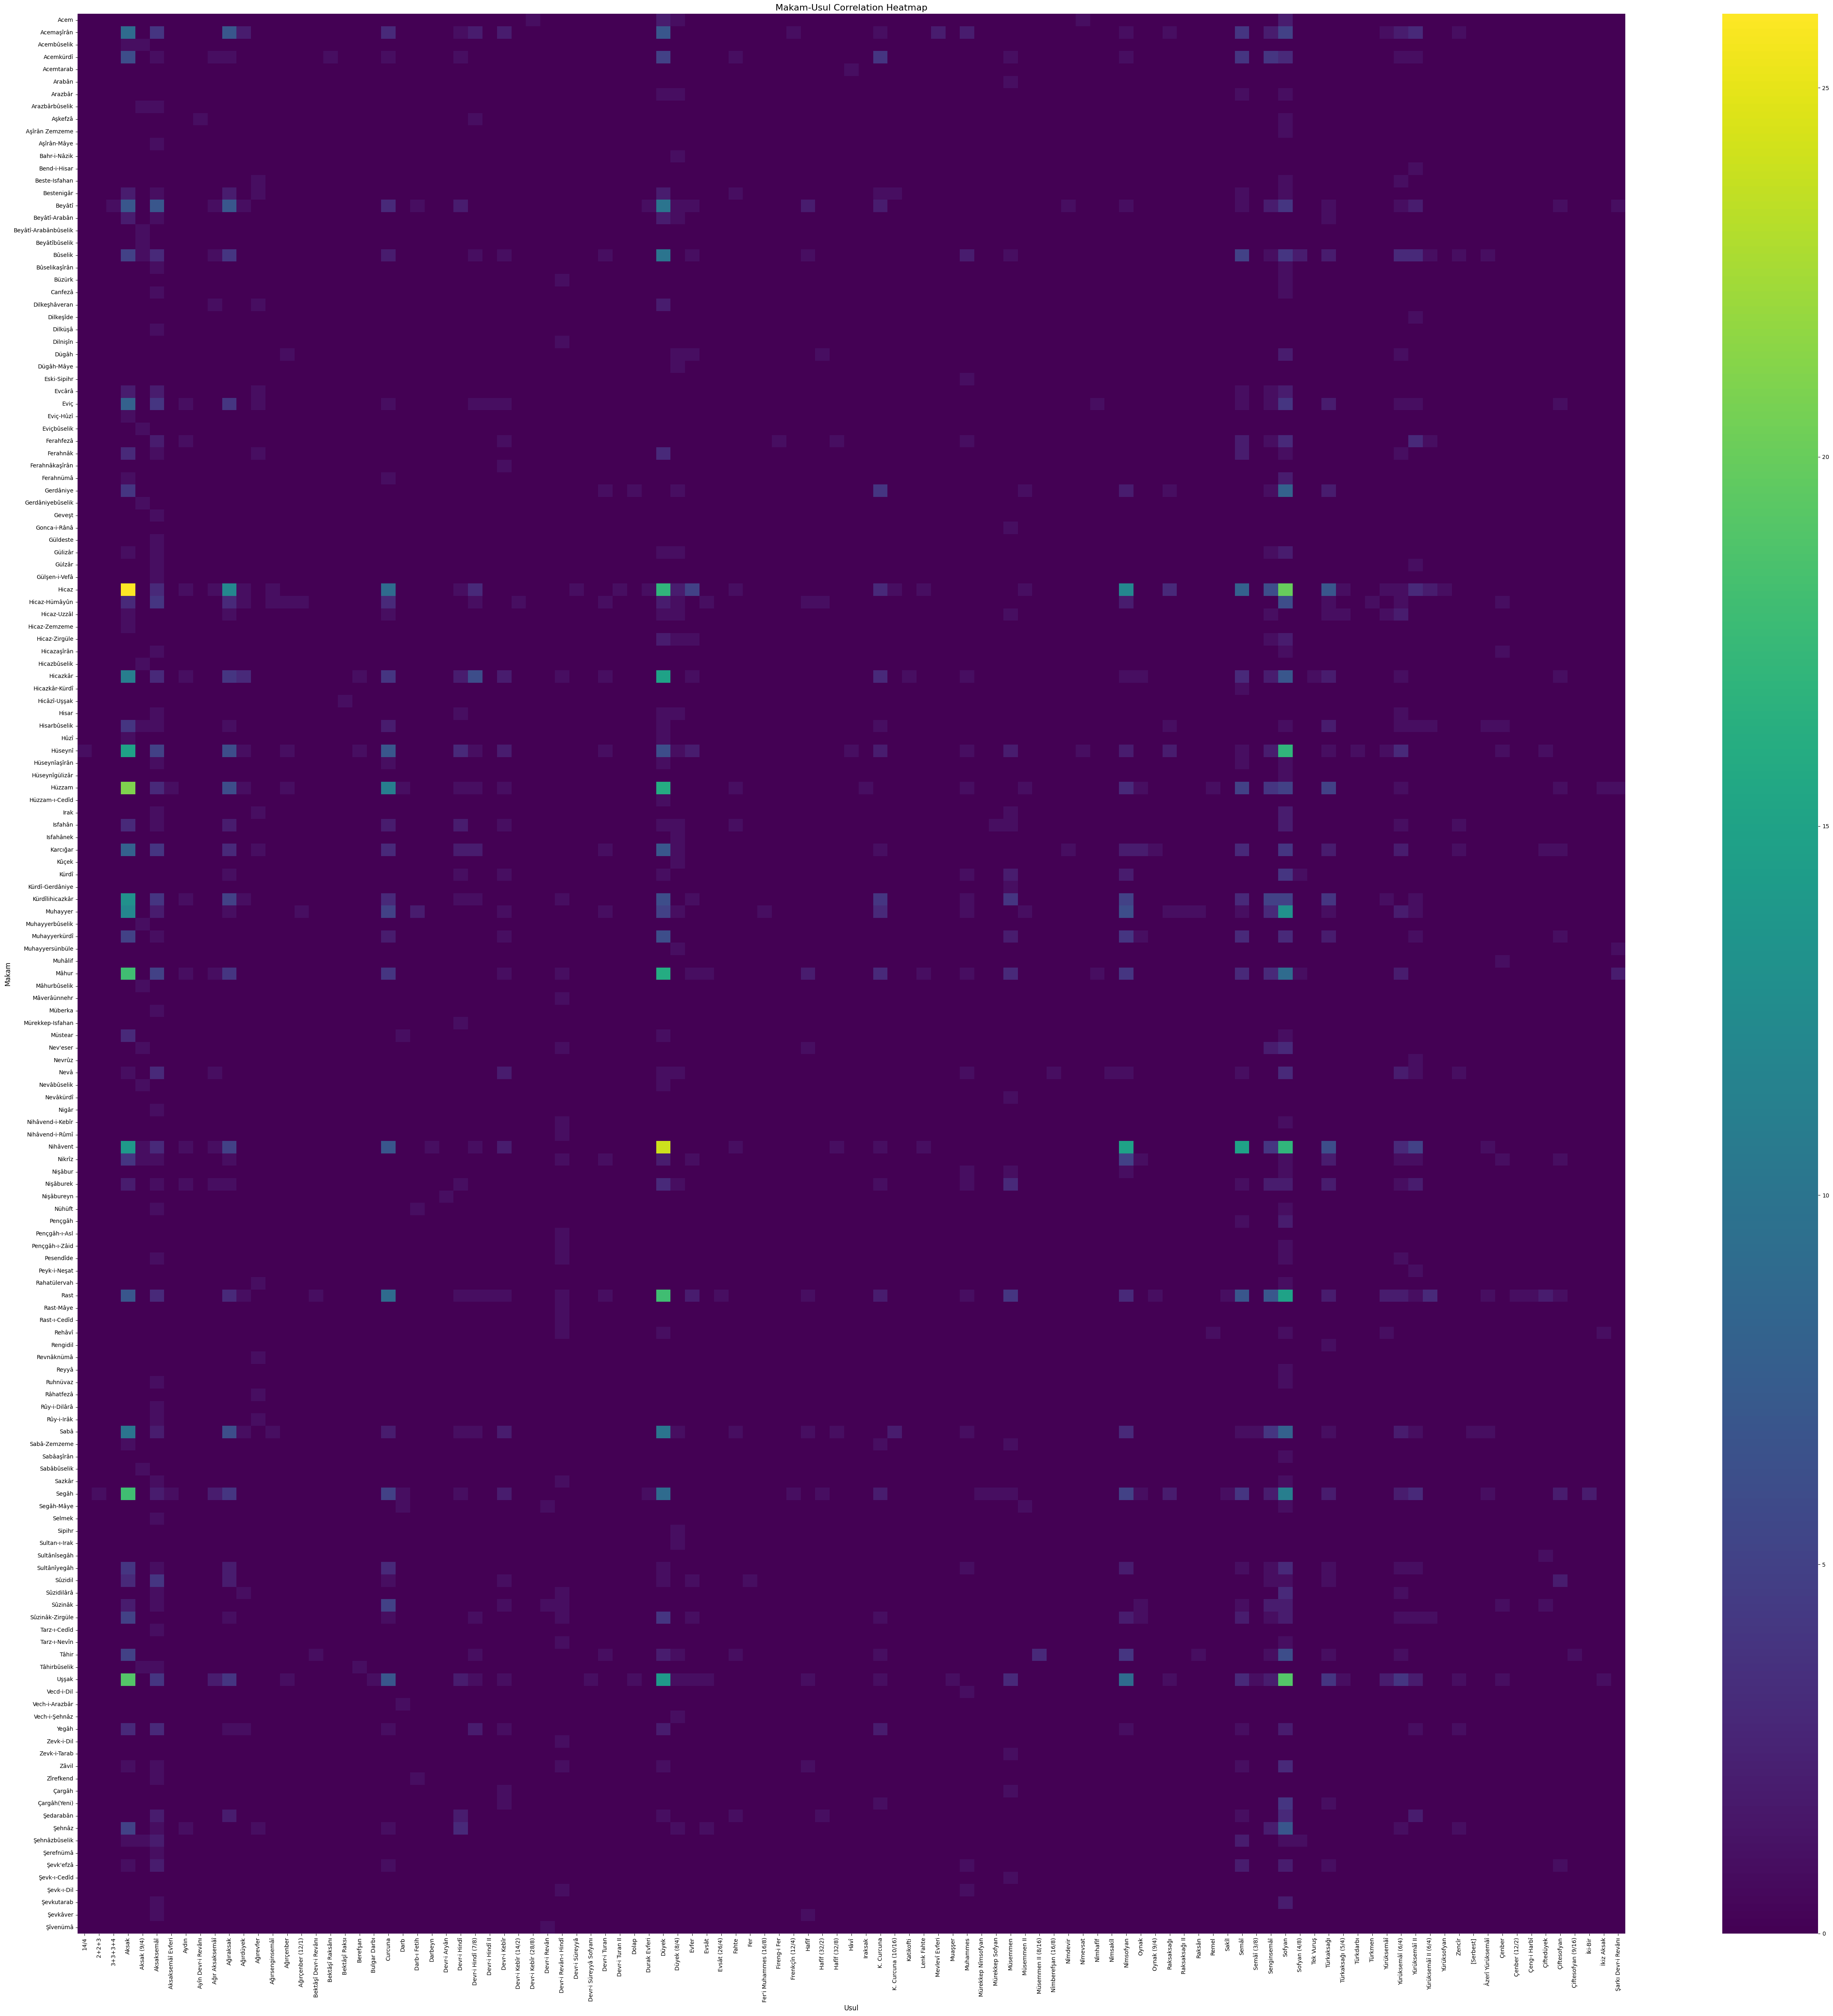

In [7]:
plt.figure(figsize=(50, 50))
sns.heatmap(makam_usul_df, annot=False, fmt="d", cmap="viridis")
plt.title("Makam-Usul Correlation Heatmap", fontsize=16)
plt.xlabel("Usul", fontsize=12)
plt.ylabel("Makam", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
# Calculate which usuls are most commonly used with each makam
makam_preferred_usuls = {}
for makam, usuls in makam_usul_counts.items():
    # Get the most common usul(s)
    if not usuls:
        continue
    max_count = max(usuls.values())
    preferred = [u for u, c in usuls.items() if c == max_count]
    makam_preferred_usuls[makam] = (preferred, max_count)

# Display the results
print("Most common usul for each makam:")
for makam, (usuls, count) in sorted(
    makam_preferred_usuls.items(), key=lambda x: x[1][1], reverse=True
)[:15]:
    print(
        f"Makam: {makam}, Preferred usul(s): {', '.join(usuls)} (used {count} times)"
    )

Most common usul for each makam:
Makam: Hicaz, Preferred usul(s): Aksak (used 26 times)
Makam: Nihâvent, Preferred usul(s): Düyek (used 24 times)
Makam: Hüzzam, Preferred usul(s): Aksak (used 21 times)
Makam: Uşşak, Preferred usul(s): Aksak, Sofyan (used 19 times)
Makam: Segâh, Preferred usul(s): Aksak (used 18 times)
Makam: Rast, Preferred usul(s): Düyek (used 18 times)
Makam: Mâhur, Preferred usul(s): Aksak (used 18 times)
Makam: Hüseynî, Preferred usul(s): Sofyan (used 17 times)
Makam: Hicazkâr, Preferred usul(s): Düyek (used 15 times)
Makam: Muhayyer, Preferred usul(s): Sofyan (used 13 times)
Makam: Kürdîlihicazkâr, Preferred usul(s): Aksak (used 13 times)
Makam: Beyâtî, Preferred usul(s): Düyek (used 10 times)
Makam: Bûselik, Preferred usul(s): Düyek (used 10 times)
Makam: Sabâ, Preferred usul(s): Düyek, Aksak (used 10 times)
Makam: Acemaşîrân, Preferred usul(s): Aksak (used 9 times)


In [12]:
makam_usul_df

,14/4,2+2+3,3+3+3+4,Aksak,Aksak (9/4),Aksaksemâî,Aksaksemâî Evferi,Aydın,Ayîn Devr-i Revânı,Ağır Aksaksemâî,...,Âzerî Yürüksemâî,Çenber,Çenber (12/2),Çeng-i Harbî,Çiftedüyek,Çiftesofyan,Çiftesofyan (9/16),İki-Bir,İkiz Aksak,Şarkı Devr-i Revânı
Acem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemaşîrân,0,0,0,9,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acembûselik,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemkürdî,0,0,0,6,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Acemtarab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şevk-ı-Cedîd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevk-ı-Dil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkutarab,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkâver,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Save the DataFrame to a CSV file with the makam names as the index
os.makedirs("../data", exist_ok=True)
makam_usul_df.to_csv("../data/makam_usul_counts.csv", index=True)